In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('datasets/Churn_Modelling.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X
y
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [17]:
import tensorflow as tf

In [18]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = keras.Sequential(
[
    Dense(11, activation= 'relu'),
    Dense(11, activation= 'relu'),
    Dense(1, activation= 'sigmoid'),
])

In [20]:
model.compile(loss = 'binary_crossentropy', optimizer = "Adam", metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split= 0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.8531 - val_loss: 0.3536 - val_accuracy: 0.8506
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8556 - val_loss: 0.3494 - val_accuracy: 0.8544
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3497 - accuracy: 0.8575 - val_loss: 0.3483 - val_accuracy: 0.8594
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8591 - val_loss: 0.3490 - val_accuracy: 0.8494
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8595 - val_loss: 0.3502 - val_accuracy: 0.8506
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8606 - val_loss: 0.3472 - val_accuracy: 0.8600
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.8606 - val_loss: 0.3444 - val_accuracy: 0.8581

Epoch 58/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3236 - accuracy: 0.8675 - val_loss: 0.3484 - val_accuracy: 0.8506
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8666 - val_loss: 0.3450 - val_accuracy: 0.8525
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8683 - val_loss: 0.3445 - val_accuracy: 0.8544
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8661 - val_loss: 0.3451 - val_accuracy: 0.8537
Epoch 62/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3231 - accuracy: 0.8678 - val_loss: 0.3467 - val_accuracy: 0.8519
Epoch 63/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8684 - val_loss: 0.3459 - val_accuracy: 0.8531
Epoch 64/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8656 - val_loss: 0.3460 - val_accuracy:

In [23]:
model.layers[0].get_weights()
model.layers[1].get_weights()
model.layers[2].get_weights()

[array([[-0.17072962],
        [ 0.7808589 ],
        [ 0.8026491 ],
        [ 0.8239477 ],
        [-0.95900506],
        [-0.75171435],
        [ 1.4644111 ],
        [ 0.98517317],
        [-0.7513161 ],
        [ 0.78994125],
        [-0.5492464 ]], dtype=float32),
 array([-0.28709614], dtype=float32)]

In [24]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [25]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8655

In [27]:
import matplotlib.pyplot as plt

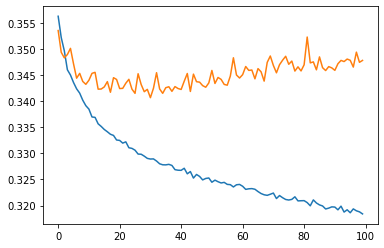

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

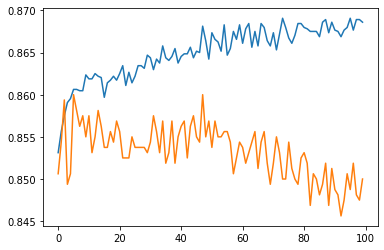

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])